# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [94]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')


## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [2]:
# EDA Question 1A solution below:
north_df.head(20)
north_df.columns
north_df['Rep ID'].count() # This is gave me the count of rows but I know there are many duplicates in the df from looking at the head
north_df['Rep ID'].nunique()
# There are 9 unique Rep IDs in the north_df

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [3]:
# EDA Question 1B solution Below:

south_df['Rep ID'].nunique()

# There are 11 unique Rep IDs in the south_df


11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [4]:
# EDA Question 2A solution Below:
north_df.columns
#north_df['Busy Minutes'].mean() # The mean is 9.9
#north_df['Incoming Wait Time'].mean()
#north_df['Not Ready Minutes'].mean()
#north_df['During Call Wait Time'].mean()

north_df[['Busy Minutes',
          'Not Ready Minutes',
          'Incoming Wait Time',
          'During Call Wait Time']].mean().round(2)


Busy Minutes             9.99
Not Ready Minutes        1.91
Incoming Wait Time       3.05
During Call Wait Time    2.97
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [5]:
# EDA Question 2B solution Below:
south_df[['Busy Minutes',
          'Not Ready Minutes',
          'Incoming Wait Time',
          'During Call Wait Time']].mean().round(2)

Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [6]:
# EDA Question 3 solution Below:
combined_df = pd.concat([north_df, south_df], ignore_index=True)
calls_by_time = (
    combined_df.groupby('Time Block', as_index=False)['Calls'].sum()
    )
calls_by_time



,Time Block,Calls
0,10:00 AM,99
1,11:00 AM,56
2,12:00 PM,120
3,1:00 PM,40
4,2:00 PM,65
5,3:00 PM,73
6,4:00 PM,53
7,5:00 PM,43
8,9:00 AM,10


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = There are 9 Reps in the North branch
- 1b) Reps in the South Branch = There are 11 Reps in the North branch


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [7]:
# Question 1 solution below
north_df.isna().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [8]:
south_df.isna().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

#### Record your answer below:

> Your Answer: There is missing data in the Incoming Wait Time column for both call centers. These missing values total 163 in the North call center and 188 values in the South call center. This missing data is expected and occurs because incoming wait time is not applicable to all calls, such as when a call is immediately answered when the rep is Ready and the call is served.
Because these missing values represent non-applicable scenarios rather than data quality issues, I would leave them as NaN rather than imputing or filling them with zero. Filling with zero could incorrectly imply that the caller waited zero seconds, which would bias averages downward and misrepresent actual wait-time performance.
Keeping these values as missing ensures that calculations like averages only include calls where wait time was meaningful, leading to more accurate analysis of call center efficiency and customer experience.

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [9]:
# Cleaning Question 2 solution below:
north_df['Sale'].value_counts() # I thought a quick check for unique values would reveal some capitalization inconsistencies. It did not.
north_df['Sale'].unique() # It appears there is a spacing difference in the two YES values.
north_df['Sale'] = north_df['Sale'].str.strip() # Removed whitespace
north_df['Sale'].value_counts()

Sale
NO     234
YES     11
Name: count, dtype: int64

##### Record your answer by below:
> Your Answer: The North dataset contained two values in the Sale column that represented the same outcome but were treated as separate categories. Initially, this suggested a possible capitalization issue, so I reviewed the value counts. The values appeared identical, but further inspection using the unique values revealed that one of the YES entries contained extra whitespace. This caused pandas to interpret it as a separate category. To resolve the issue, I removed whitespace from the Sale column using the strip method. After cleaning, the column correctly contained only two consistent values: YES and NO.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [28]:
# Cleaning Question 3 solution below:
north_df.duplicated().sum()

np.int64(0)

In [29]:
south_df.duplicated().sum()

np.int64(0)

##### Record your answer below:
> Your Answer: No duplicate rows were found in either call center's data set. Each row represents a distinct call record so no duplicate removal or any other change was nessesary in that regard. 

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [25]:
# Cleaning Question 4 solution below:
combined_df.columns # Further inspection of columns shows an Unnamed 0 column
combined_df['Unnamed: 0'].describe()
combined_df['Unnamed: 0'].value_counts()
combined_df.shape
combined_df['Unnamed: 0'].nunique() 
north_df.shape
south_df.shape
combined_df = combined_df.drop(columns=['Unnamed: 0'])



##### Record your answer below:
> Your Answer: After inspection, I indentified the Unnamed: 0 column as unnecessary. The values were repeated after combining the datasets which confirmed that the column was an index artifact from the original CSV files. Because it does not describe call activity or performance and could be misleading it was removed. All other columns were retained because they contribute useful information to the analysis even when some values are missing.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [ ]:
# Create dataframe for the entire company named df
# Making copies so I don't accidentally modify the original dfs
north_df_copy = north_df.copy()
south_df_copy = south_df.copy()
# Next combine datasets
df = pd.concat([north_df_copy, south_df_copy], ignore_index=True)
# Next drop index artifact 
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])
df.shape # Woohoo! Successfully combined the two datasets
df.columns # Checking that index artifact is gone. It is.

Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [ ]:
# Manipulation Question solution below:
# Group by Branch and Rep ID and sum total calls
rep_call_totals = (
                    df
                   .groupby(['Branch', 'Rep ID'], as_index=False)['Calls'] #use the method groupby and pass the columns Branch and Rep ID 
                   .sum() #sum the Calls column
                   .rename(columns={'Calls': 'Total Calls'}) #rename the Calls column to Total Calls)
                   ) # Don't forget to close the parentheses for the entire expression

rep_call_totals_sorted = rep_call_totals.sort_values(
    by=['Branch', 'Total Calls'], #sort first by Branch then by Total Calls
    ascending=[True, False]
)

top_reps = rep_call_totals_sorted.groupby('Branch').first()
top_reps


,Rep ID,Total Calls
Branch,,
North,Brent,37
South,Eric,35


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = The Rep with the highest number of call is Brent with 36 total calls.
- South Branch = The Rep with the highest number of call is Eric with 35 total calls.

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [81]:
# Manipulation Question 2 solution below:
# Find abandoned column and look at values 
df.head(10)
df['Abandoned'].unique() # Only values are 0 and 1. Possible boolean
df.dtypes # The abandoned calls column is not a boolean, it is an integer type
# Calculate abandonment rate by branch
branch_abandonment = (
    df
    .groupby('Branch', as_index=False)[['Abandoned', 'Calls']] # Group by Branch and select Abandoned and Calls columns
    .sum()
)
# Set up column for abandonment rate under branch_abandonment dataframe variable 
branch_abandonment['Abandonment Rate'] = (
    branch_abandonment['Abandoned'] / branch_abandonment['Calls'] # Calculate abandonment rate
)
# Company-wide 
total_abandoned = branch_abandonment['Abandoned'].sum()  # Assign total abandoned calls to variable
total_calls = branch_abandonment['Calls'].sum() # Assign total calls to variable
company_abandonment_rate = total_abandoned / total_calls # Calculate company-wide abandonment rate
company_abandonment_rate
# Set up column for abandonment rate percentage 
branch_abandonment['Abandonment Rate %'] = (
    branch_abandonment['Abandonment Rate'] * 100 # Convert abandonment rate to percentage
).round(2) # Round to the nearest hundredth per question below 

company_abandonment_rate_percent = round(company_abandonment_rate * 100, 2) # Company wide abandonment rate percentage
#company_abandonment_rate_percent
branch_abandonment


,Branch,Abandoned,Calls,Abandonment Rate,Abandonment Rate %
0,North,7,245,0.028571,2.86
1,South,4,314,0.012739,1.27


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86
- South Branch = 1.27
- Company Wide = 1.97
- Do any of these fall out of the optimal range of 2-5%?: The North branch’s average call abandonment rate falls within the optimal range of 2–5%. The South branch and the company-wide abandonment rates fall below the optimal range, which may indicate lower call volume relative to staffing levels or a differnce in call handling effiecncy between the staff of each branch.

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [90]:
# Manipulation Question 3 solution below:
# Find incoming wait time column and look at values 
df.head(10)
# Get descriptive statistics for the column
df['Incoming Wait Time'].describe() # Mean is at 3. 
# Create column for calls answered within 2 seconds
df['Answered Within 2 Seconds'] = df['Incoming Wait Time'] <= 2
# Calculate service level by branch
service_level_branch = (
    df
    .groupby('Branch')
    .apply(
        lambda x: x['Answered Within 2 Seconds'].sum() / x['Calls'].sum()
    )
    .reset_index(name='Service Level')
)

# Convert to percentage and round
service_level_branch['Service Level %'] = (service_level_branch['Service Level'] * 100).round(2)

service_level_branch

# Company-wide 
company_service_level = (
    df['Answered Within 2 Seconds'].sum() / df['Calls'].sum()
)

company_service_level_percent = round(company_service_level * 100, 2)
company_service_level_percent
service_level_branch


/var/folders/r9/rmnbmvdd6qn80qqjqcl3h1tc0000gn/T/ipykernel_84451/2824327361.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,Branch,Service Level,Service Level %
0,North,0.134694,13.47
1,South,0.152866,15.29


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 13.47%
- South Branch = 15.29%
- Company Wide = 14.49%

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [93]:
# Manipulation Question 4 solution below:
# Calculate average speed of answer by branch
avg_speed_branch = (
    df
    .groupby('Branch', as_index=False)['Incoming Wait Time']
    .mean()
    .rename(columns={'Incoming Wait Time': 'Average Speed of Answer'})
)

# Round to nearest hundredth
avg_speed_branch['Average Speed of Answer'] = avg_speed_branch['Average Speed of Answer'].round(2)

avg_speed_branch

# Company-wide  
company_avg_speed = round(df['Incoming Wait Time'].mean(), 2)
company_avg_speed




np.float64(3.02)

##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 Seconds
- South Branch in seconds = 3.00 Seconds
- Company Wide in seconds = 3.02 Seconds

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

/var/folders/r9/rmnbmvdd6qn80qqjqcl3h1tc0000gn/T/ipykernel_84451/445284754.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


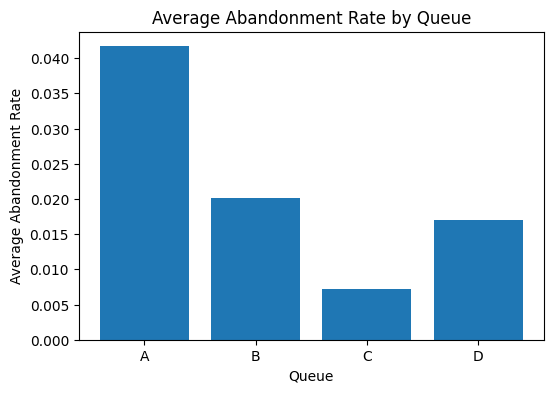

In [ ]:
# Create visualization 1 here
# Import any additional libraries needed with alias

# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your code below:

# Prepare data for plotting
queues = list(abandonment_rates.keys())
rates = list(abandonment_rates.values())

# I think a bar chart works best here
plt.figure(figsize=(6,4))
plt.bar(queues, rates)
plt.xlabel("Queue")
plt.ylabel("Average Abandonment Rate")
plt.title("Average Abandonment Rate by Queue")
plt.show()


##### Record your answer below:

> Chart style you chose and why: I chose a bar chart here because bar charts are good at comparing seperate catergories to one another against  distinct values. Here, each queue is seperate category and each category is measured against abandonment rate.

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

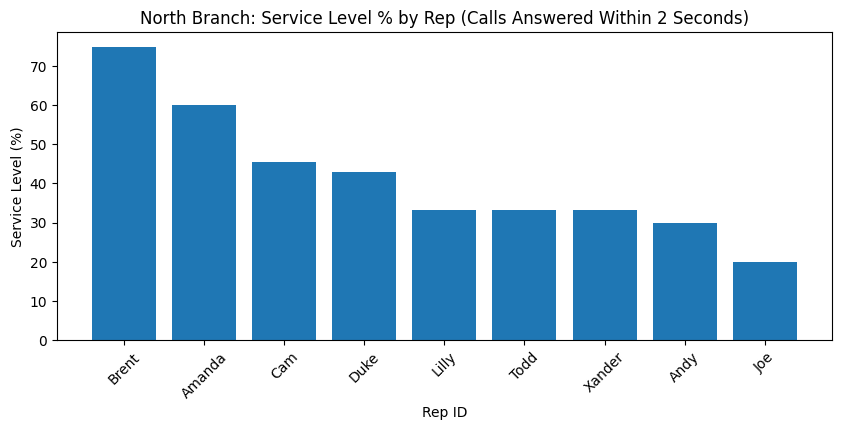

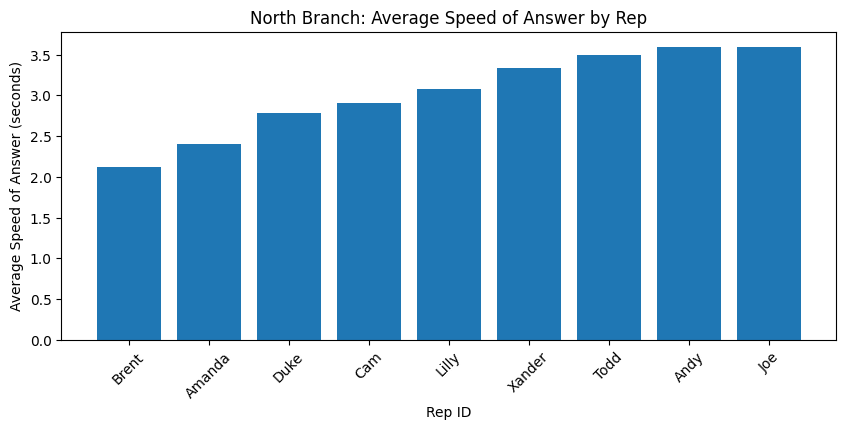

In [108]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep
north = north_df 
north_plt = north.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north[north["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north[north["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:

# Bar chart: Service Level % by Rep ID

service_level_plot = service_level.reset_index()[['Rep ID', 'Service Level %']].sort_values('Service Level %', ascending=False) # Just want to make sure rep ID isn't and index and narrow what I need for the plot

plt.figure(figsize=(10, 4))
plt.bar(service_level_plot['Rep ID'].astype(str), service_level_plot['Service Level %'])
plt.xlabel('Rep ID')
plt.ylabel('Service Level (%)')
plt.title('North Branch: Service Level % by Rep (Calls Answered Within 2 Seconds)')
plt.xticks(rotation=45)
plt.show()

# Bar chart: Average Speed of Answer by Rep ID (seconds)

north_plt_sorted = north_plt.sort_values('Incoming Wait Time') # Sorting the data for better visualization

plt.figure(figsize=(10, 4))
plt.bar(north_plt_sorted['Rep ID'].astype(str), north_plt_sorted['Incoming Wait Time'])
plt.xlabel('Rep ID')
plt.ylabel('Average Speed of Answer (seconds)')
plt.title('North Branch: Average Speed of Answer by Rep')
plt.xticks(rotation=45)
plt.show()





##### Record your answer below:

> Chart style you chose and why: I used bar charts because we are comparing individual reps against a single metric. Bar charts make it easy to compare performance across reps for both service level percentage and average speed of answer.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


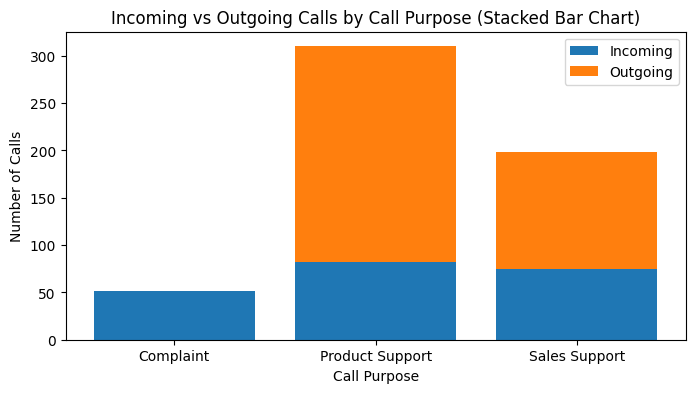

In [110]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

# Prepare the categories
purposes = ["Complaint", "Product Support", "Sales Support"]

# Extract incoming counts
incoming_counts = [
    complaints.get("Incoming", 0),
    product_support.get("Incoming", 0),
    sales_support.get("Incoming", 0)
]

# Extract outgoing counts
outgoing_counts = [
    complaints.get("Outgoing", 0),
    product_support.get("Outgoing", 0),
    sales_support.get("Outgoing", 0)
]

# Stacked bar chart
plt.figure(figsize=(8, 4))

plt.bar(purposes, incoming_counts, label="Incoming")
plt.bar(purposes, outgoing_counts, bottom=incoming_counts, label="Outgoing")

plt.xlabel("Call Purpose")
plt.ylabel("Number of Calls")
plt.title("Incoming vs Outgoing Calls by Call Purpose (Stacked Bar Chart)")
plt.legend()

plt.show()



##### Record your answer below:

> Chart style you chose and why: I chose a stacked bar chart because it lets me compare the total call volume for each call purpose while also showing how those calls split between incoming and outgoing. This way, we can see both workload and call purpose in a single visual.

## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


In [114]:
print(service_level_branch)

print(branch_abandonment)

print(north_df['Rep ID'].nunique())
print(south_df['Rep ID'].nunique())


  Branch  Service Level  Service Level %
0  North       0.134694            13.47
1  South       0.152866            15.29
  Branch  Abandoned  Calls  Abandonment Rate  Abandonment Rate %
0  North          7    245          0.028571                2.86
1  South          4    314          0.012739                1.27
9
11


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: Based on service level and abandonment rate, the South branch appears to be operating more efficiently. The South branch answers a higher percentage of calls within two seconds and has a lower abandonment rate than the North branch. Although the North branch’s abandonment rate falls within the optimal range, the South branch’s faster response times and lower call abandonment suggest more effective call handling overall.



#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: Based on the KPIs and staffing levels, the North branch would benefit most from additional help. The North team has fewer reps likely contributing to their higher abandonment rate and a lower service level compared to the South branch. Additional staffing would likely improve response times and reduce call abandonment.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: I wish the dataset included information about call length, call outcomes, queue wait times and shift coverage. These details would allow a fuller understanding of rep performance, how the workload is distributed, and peak staffing needs. Customer satisfaction scores would have been helpful too. That way I could see whether the KPIs that suggest lower performance actually line up with how customers feel about the service.


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: I used a grouped bar chart because it’s the clearest way to compare multiple call purposes across each time block. It keeps the categories separate and makes it easier to see how call patterns change throughout the day.

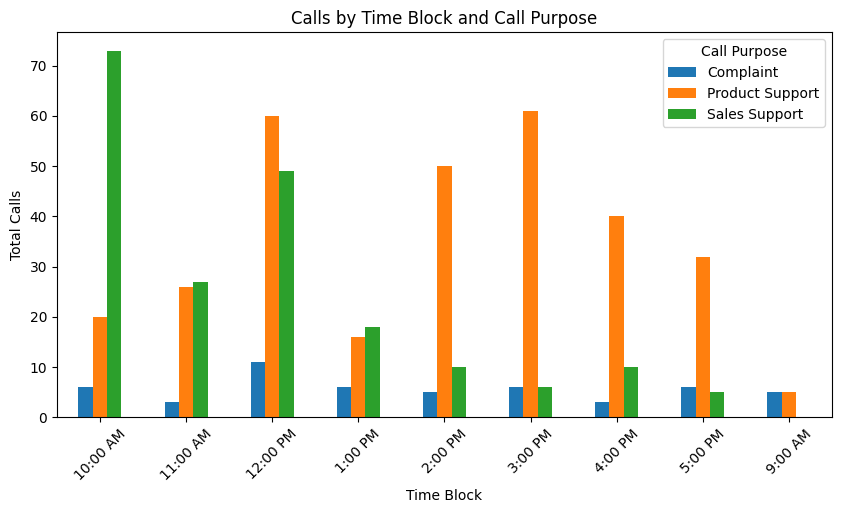

In [122]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:
purpose_groups = call_times.groupby("Call Purpose")

# Use groupby and get_group to select which call purpose to plot:

complaints_df = purpose_groups.get_group("Complaint")
product_df = purpose_groups.get_group("Product Support")
sales_df = purpose_groups.get_group("Sales Support")

complaints_by_time = complaints_df.groupby("Time Block")["Calls"].sum()
product_by_time = product_df.groupby("Time Block")["Calls"].sum()
sales_by_time = sales_df.groupby("Time Block")["Calls"].sum()

# Combine to a single DataFrame for plotting
final_df = pd.DataFrame({
    "Complaint": complaints_by_time,
    "Product Support": product_by_time,
    "Sales Support": sales_by_time
})

# Create grouped bar chart
final_df.plot(kind="bar", figsize=(10,5))

plt.xlabel("Time Block")
plt.ylabel("Total Calls")
plt.title("Calls by Time Block and Call Purpose")
plt.xticks(rotation=45)
plt.legend(title="Call Purpose")
plt.show()
